In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:

df = pd.read_csv('btc_6h.csv')


In [6]:
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))
df

,datetime,open,high,low,close,volume
2018-01-01 05:30:00,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13558.99,2421.241182
2018-01-01 11:30:00,2018-01-01 11:30:00,13539.00,13818.55,13001.13,13220.56,1876.934392
2018-01-01 17:30:00,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13022.00,2427.898747
2018-01-01 23:30:00,2018-01-01 23:30:00,13007.87,13599.70,12940.00,13380.00,1883.841523
2018-01-02 05:30:00,2018-01-02 05:30:00,13382.16,13850.00,12890.02,13166.95,3957.954564
...,...,...,...,...,...,...
2022-01-30 05:30:00,2022-01-30 05:30:00,38166.83,38300.00,37737.49,38139.39,4656.397760
2022-01-30 11:30:00,2022-01-30 11:30:00,38139.38,38359.26,37795.00,38110.02,6113.435610
2022-01-30 17:30:00,2022-01-30 17:30:00,38110.03,38153.82,37712.05,37991.00,4075.221880
2022-01-30 23:30:00,2022-01-30 23:30:00,37991.00,38230.00,37351.63,37881.76,6585.610020


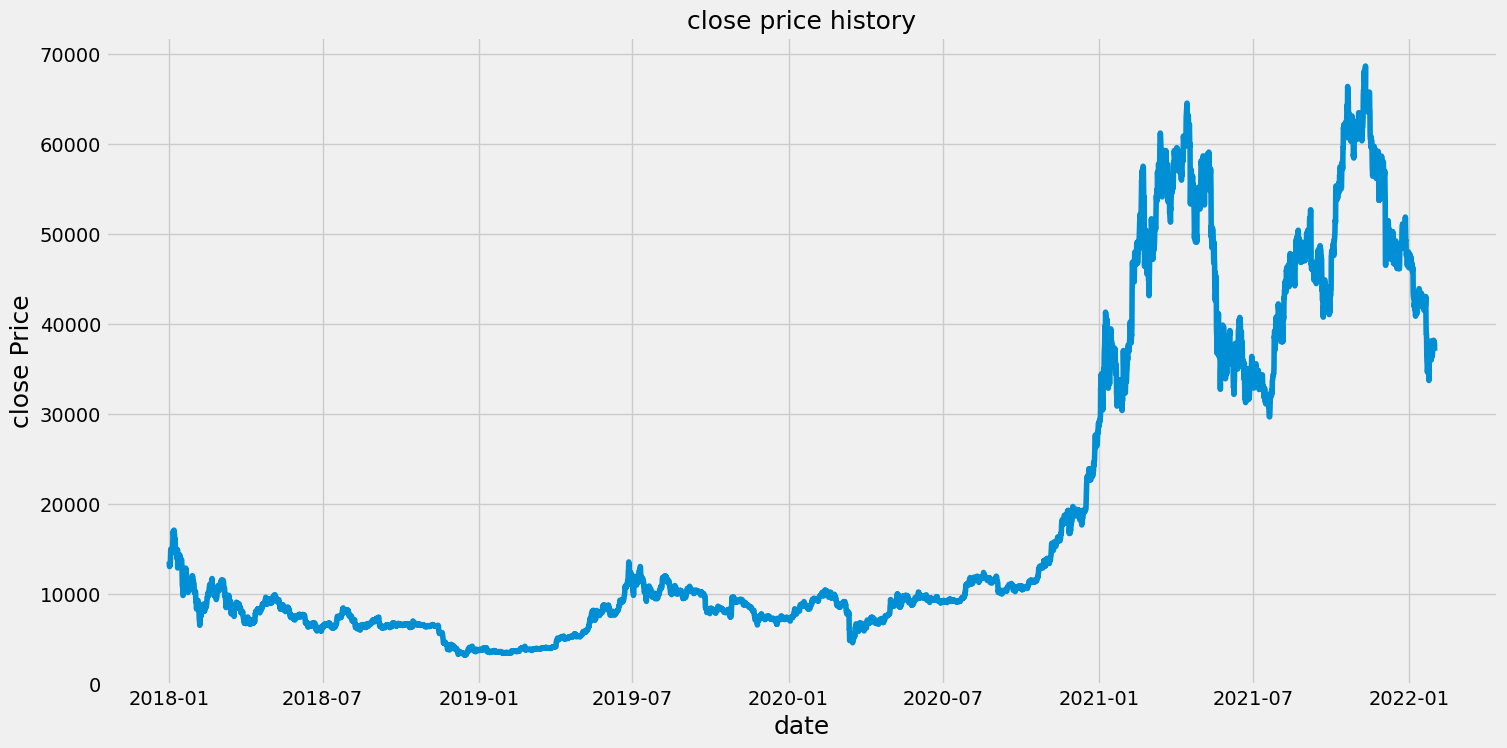

In [7]:
plt.figure(figsize=(16,8))
plt.title('close price history', fontsize = 18)
plt.plot(df['close'])
plt.xlabel('date' , fontsize = 18)
plt.ylabel('close Price',fontsize = 18)
plt.show()

In [8]:
#function to calc SMA
def SMA(data, period = 60, column = 'close'):
    return data[column].rolling(window=period).mean()

In [9]:
df['SMA20'] =SMA(df, 200)
df['SMA50'] =SMA(df, 500)


In [10]:

df['signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['position'] = df['signal'].diff()

df['Buy'] = np.where(df['position']== 1, df['close'], np.NAN)
df['sell'] = np.where(df['position']== -1, df['close'], np.NAN)

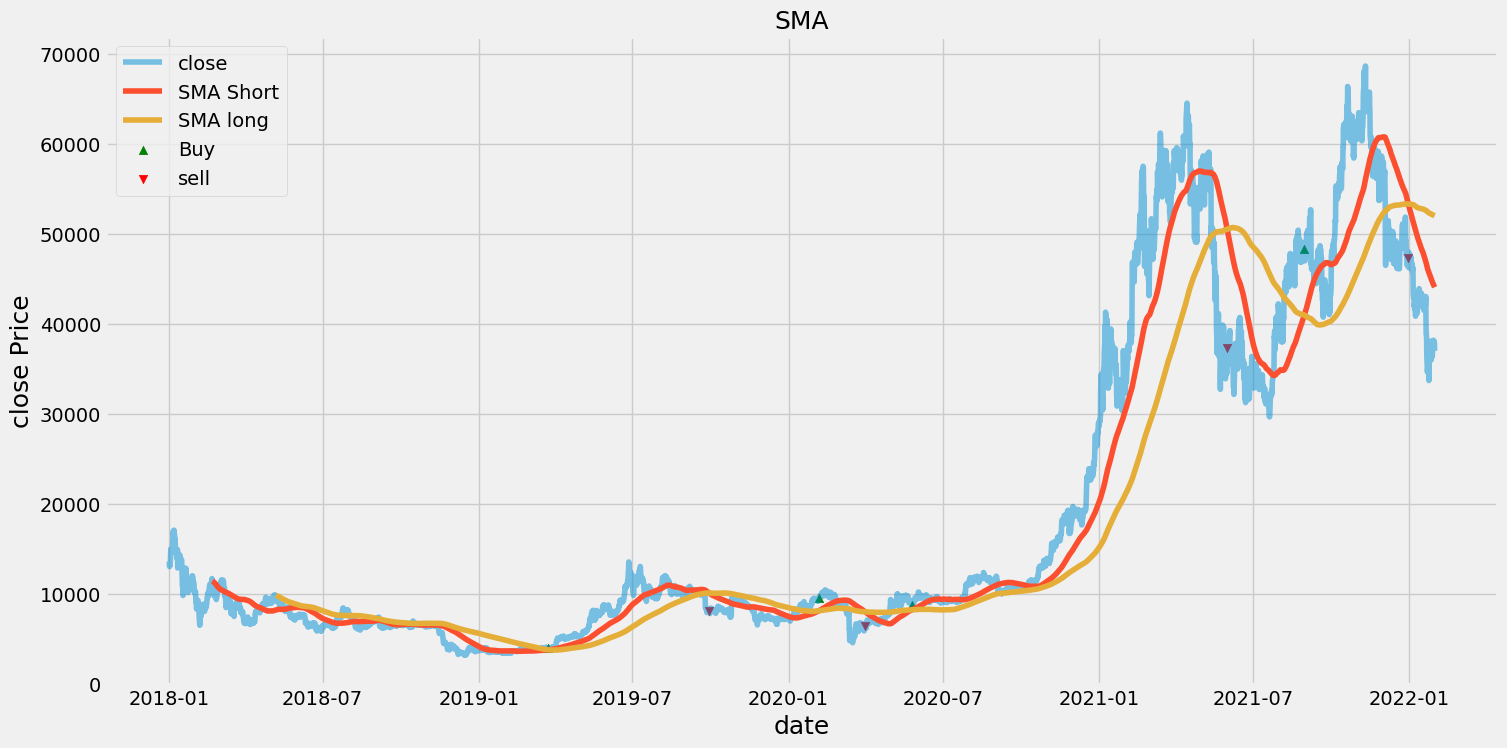

In [13]:
plt.figure(figsize=(16,8))
plt.title('SMA', fontsize = 18)
plt.plot(df['close'], alpha = 0.5, label = 'close')
plt.plot(df['SMA20'], alpha = 1, label = 'SMA20')
plt.plot(df['SMA50'], alpha = 1, label = 'SMA50')
plt.scatter(df.index, df['Buy'], alpha = 1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['sell'], alpha = 1, label = 'sell Signal', marker = 'v', color = 'red')

plt.xlabel('date' , fontsize = 18)
plt.ylabel('close Price',fontsize = 18)
plt.legend(['close', 'SMA Short', 'SMA long', 'Buy', 'sell'])
plt.show()